### Mini-project on "Conducting a bipartite network analysis to assess people's behavioural patterns".
Completed by **Adelina Ismagilova**, K42111.

In [262]:
import warnings
warnings.filterwarnings('ignore')

import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
print('NetworkX version: {}'.format(nx.__version__))

NetworkX version: 2.5


## Bipartite Graphs

Bipartite graphs $B = (U, V, E)$ have two node sets $U$,$V$ and edges in $E$ that only connect nodes from opposite sets. It is common in the literature to use an spatial analogy referring to the two node sets as top and bottom nodes.

The bipartite algorithms are not imported into the NetworkX namespace at the top level so the easiest way to use them is with:

In [263]:
from networkx.algorithms import bipartite

In [264]:
B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(['a', 'b', 'c'], bipartite=1)
# Add edges only between nodes of opposite node sets
B.add_edges_from([(1, 'a'), (1, 'b'), (2, 'b'), (2, 'c'), (3, 'c'), (4, 'a')])

Many algorithms of the bipartite module of NetworkX require, as an argument, a container with all the nodes that belong to one set, in addition to the bipartite graph $B$. The functions in the bipartite package do not check that the node set is actually correct nor that the input graph is actually bipartite. If $B$ is connected, you can find the two node sets using a two-coloring algorithm:

In [265]:
nx.is_connected(B)

True

In [266]:
bottom_nodes, top_nodes = bipartite.sets(B)
print(top_nodes)

{'c', 'b', 'a'}


In [267]:
top_nodes = {n for n, d in B.nodes(data=True) if d['bipartite']==0}
bottom_nodes = set(B) - top_nodes

In [268]:
bipartite.density(B, bottom_nodes)

0.5

All bipartite graph generators in NetworkX build bipartite graphs with the bipartite node attribute. 

In [269]:
RB = bipartite.random_graph(5, 7, 0.2)
RB_top = {n for n, d in RB.nodes(data=True) if d['bipartite']==0}
RB_bottom = set(RB) - RB_top

In [270]:
list(RB_top)

[0, 1, 2, 3, 4]

In [271]:
list(RB_bottom)

[5, 6, 7, 8, 9, 10, 11]

### Working with bipartite graphs: modeling group affiliations

We'll use as an example the data collected by Davis et al. in 1930s about the observed attendance at 14 social events by 18 women in a Southern state of the USA.

The nodes in the bipartite graph are both women and events, and each women is linked to the events that she attended.

In [272]:
D = nx.davis_southern_women_graph()
list(D.nodes(data=True))

[('Evelyn Jefferson', {'bipartite': 0}),
 ('Laura Mandeville', {'bipartite': 0}),
 ('Theresa Anderson', {'bipartite': 0}),
 ('Brenda Rogers', {'bipartite': 0}),
 ('Charlotte McDowd', {'bipartite': 0}),
 ('Frances Anderson', {'bipartite': 0}),
 ('Eleanor Nye', {'bipartite': 0}),
 ('Pearl Oglethorpe', {'bipartite': 0}),
 ('Ruth DeSand', {'bipartite': 0}),
 ('Verne Sanderson', {'bipartite': 0}),
 ('Myra Liddel', {'bipartite': 0}),
 ('Katherina Rogers', {'bipartite': 0}),
 ('Sylvia Avondale', {'bipartite': 0}),
 ('Nora Fayette', {'bipartite': 0}),
 ('Helen Lloyd', {'bipartite': 0}),
 ('Dorothy Murchison', {'bipartite': 0}),
 ('Olivia Carleton', {'bipartite': 0}),
 ('Flora Price', {'bipartite': 0}),
 ('E1', {'bipartite': 1}),
 ('E2', {'bipartite': 1}),
 ('E3', {'bipartite': 1}),
 ('E4', {'bipartite': 1}),
 ('E5', {'bipartite': 1}),
 ('E6', {'bipartite': 1}),
 ('E7', {'bipartite': 1}),
 ('E8', {'bipartite': 1}),
 ('E9', {'bipartite': 1}),
 ('E10', {'bipartite': 1}),
 ('E11', {'bipartite': 1}

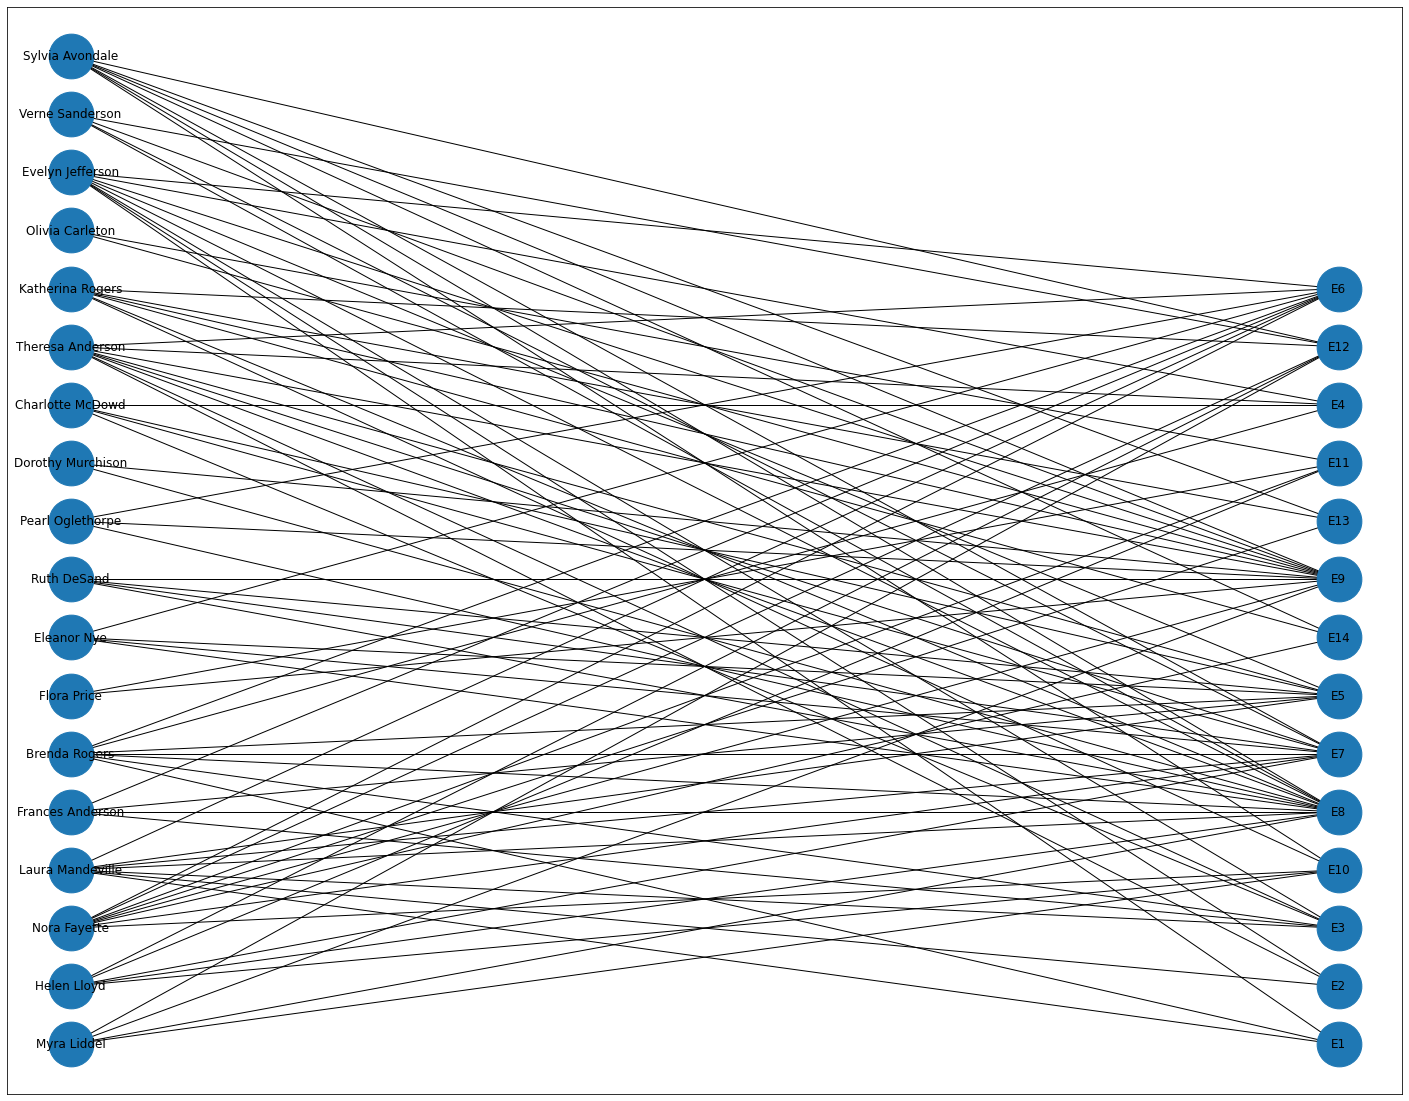

In [273]:
# Separate by group
l, r = nx.bipartite.sets(D)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

plt.figure(figsize=(25,20))
nx.draw_networkx(D, pos=pos, node_size=2000)


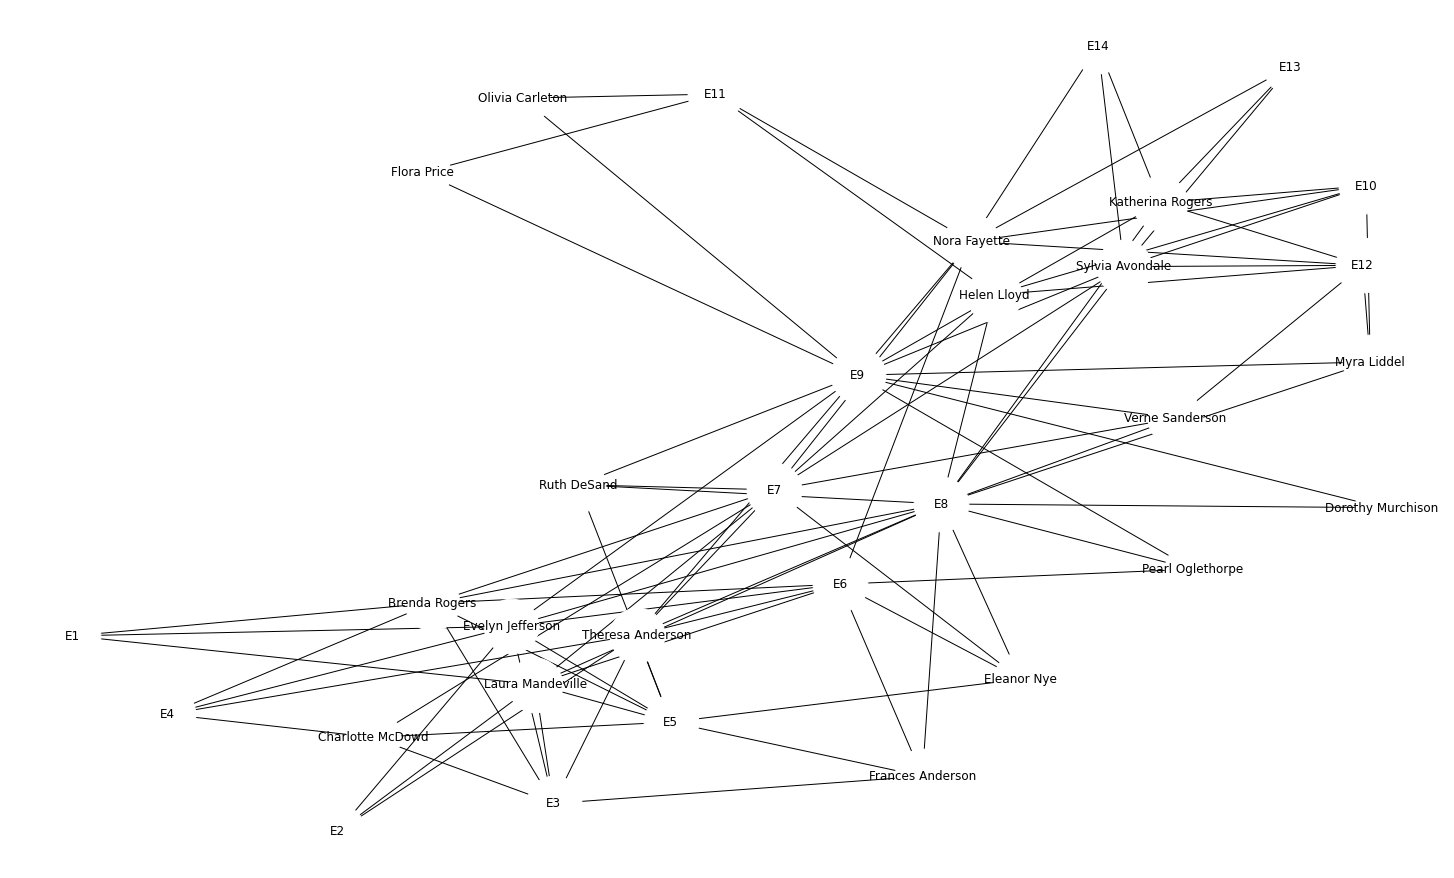

In [274]:
plt.figure(figsize=(20,12))
nx.draw(D, node_size=3000, node_color='white', with_labels=True)

The process of obtaining an unipartite graph with only women that are linked if they attended the same events is named **projection**. We can weight the edges of the projection using different criteria, for instance, we can make the weight of an edge to represent the number of event that the two women attended.

In [275]:
women = {n for n, d in D.nodes(data=True) if d['bipartite']==0}
W = bipartite.weighted_projected_graph(D, women)

In [276]:
list(W.nodes())

['Myra Liddel',
 'Helen Lloyd',
 'Frances Anderson',
 'Nora Fayette',
 'Brenda Rogers',
 'Eleanor Nye',
 'Flora Price',
 'Ruth DeSand',
 'Pearl Oglethorpe',
 'Dorothy Murchison',
 'Charlotte McDowd',
 'Theresa Anderson',
 'Katherina Rogers',
 'Verne Sanderson',
 'Olivia Carleton',
 'Evelyn Jefferson',
 'Laura Mandeville',
 'Sylvia Avondale']

In [278]:
list(W.edges(data=True))

[('Myra Liddel', 'Frances Anderson', {'weight': 1}),
 ('Myra Liddel', 'Pearl Oglethorpe', {'weight': 2}),
 ('Myra Liddel', 'Olivia Carleton', {'weight': 1}),
 ('Myra Liddel', 'Dorothy Murchison', {'weight': 2}),
 ('Myra Liddel', 'Evelyn Jefferson', {'weight': 2}),
 ('Myra Liddel', 'Ruth DeSand', {'weight': 2}),
 ('Myra Liddel', 'Katherina Rogers', {'weight': 4}),
 ('Myra Liddel', 'Laura Mandeville', {'weight': 1}),
 ('Myra Liddel', 'Nora Fayette', {'weight': 3}),
 ('Myra Liddel', 'Sylvia Avondale', {'weight': 4}),
 ('Myra Liddel', 'Brenda Rogers', {'weight': 1}),
 ('Myra Liddel', 'Eleanor Nye', {'weight': 1}),
 ('Myra Liddel', 'Flora Price', {'weight': 1}),
 ('Myra Liddel', 'Theresa Anderson', {'weight': 2}),
 ('Myra Liddel', 'Verne Sanderson', {'weight': 3}),
 ('Myra Liddel', 'Helen Lloyd', {'weight': 3}),
 ('Helen Lloyd', 'Frances Anderson', {'weight': 1}),
 ('Helen Lloyd', 'Pearl Oglethorpe', {'weight': 1}),
 ('Helen Lloyd', 'Olivia Carleton', {'weight': 1}),
 ('Helen Lloyd', 'Dorot

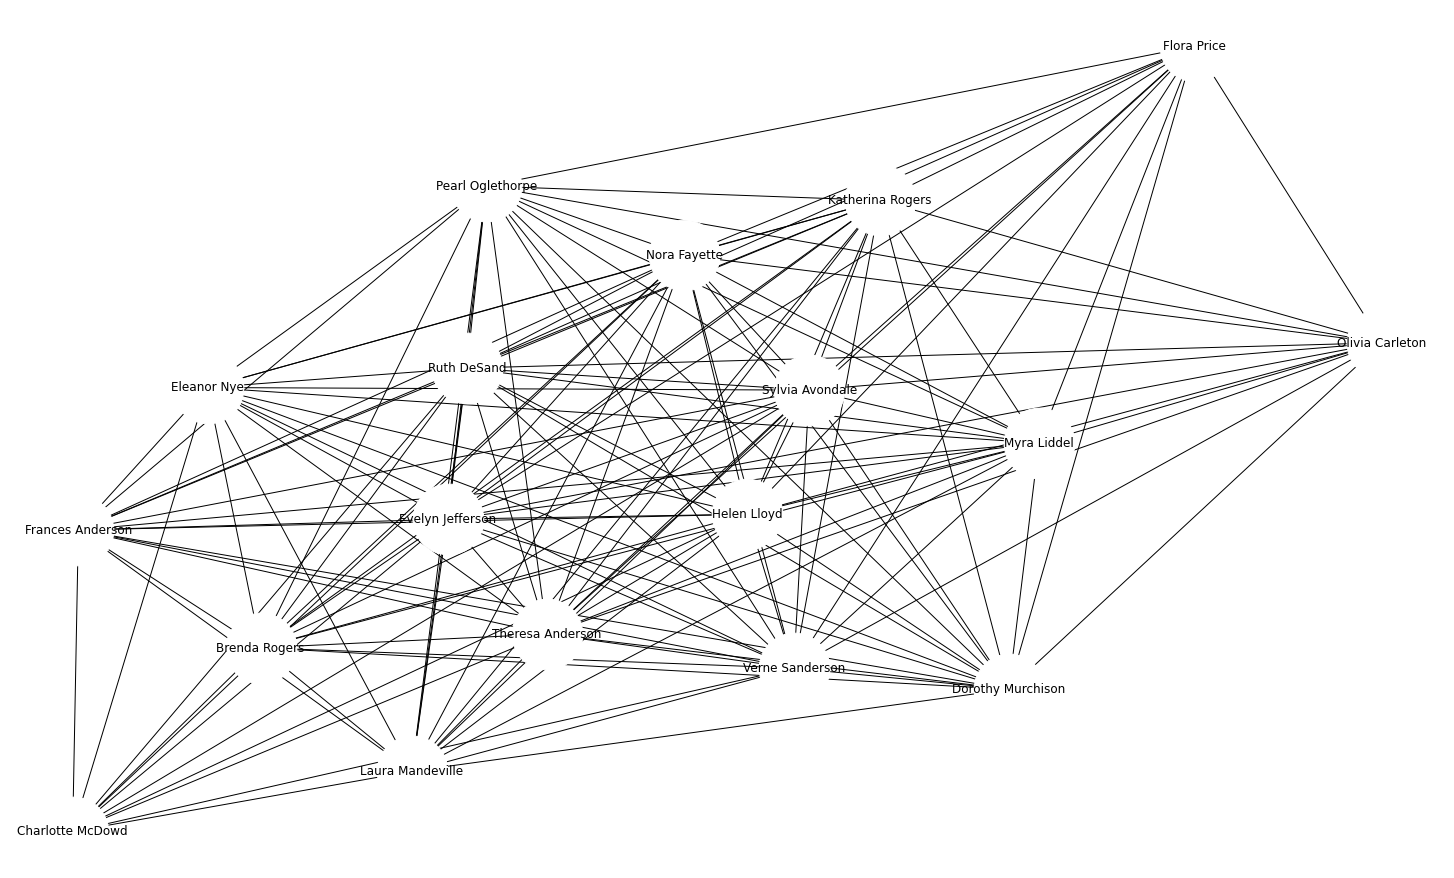

In [279]:
plt.figure(figsize=(20,12))
nx.draw(W, node_size=5000, node_color='white', with_labels=True)

#### Centrality measures of bipartite graphs


In [280]:
from operator import itemgetter

In [281]:
degc = bipartite.degree_centrality(D, women)
sorted(degc.items(), key=itemgetter(1), reverse=True)

[('E8', 0.7777777777777777),
 ('E9', 0.6666666666666666),
 ('Evelyn Jefferson', 0.5714285714285714),
 ('Nora Fayette', 0.5714285714285714),
 ('Theresa Anderson', 0.5714285714285714),
 ('E7', 0.5555555555555556),
 ('Laura Mandeville', 0.5),
 ('Sylvia Avondale', 0.5),
 ('Brenda Rogers', 0.5),
 ('E5', 0.4444444444444444),
 ('E6', 0.4444444444444444),
 ('Katherina Rogers', 0.42857142857142855),
 ('Helen Lloyd', 0.3571428571428571),
 ('E3', 0.3333333333333333),
 ('E12', 0.3333333333333333),
 ('Myra Liddel', 0.2857142857142857),
 ('Frances Anderson', 0.2857142857142857),
 ('Ruth DeSand', 0.2857142857142857),
 ('Eleanor Nye', 0.2857142857142857),
 ('Charlotte McDowd', 0.2857142857142857),
 ('Verne Sanderson', 0.2857142857142857),
 ('E10', 0.2777777777777778),
 ('E11', 0.2222222222222222),
 ('E4', 0.2222222222222222),
 ('Pearl Oglethorpe', 0.21428571428571427),
 ('E1', 0.16666666666666666),
 ('E2', 0.16666666666666666),
 ('E14', 0.16666666666666666),
 ('E13', 0.16666666666666666),
 ('Olivia Ca

In [282]:
bet = bipartite.betweenness_centrality(D, women)
sorted(bet.items(), key=itemgetter(1), reverse=True)

[('E8', 0.24381946234957552),
 ('E9', 0.22551359177204106),
 ('E7', 0.12950174424519842),
 ('Nora Fayette', 0.11346136204298476),
 ('Evelyn Jefferson', 0.09658472108029267),
 ('Theresa Anderson', 0.08759468547944677),
 ('Sylvia Avondale', 0.07170914508501829),
 ('E6', 0.06501635047516072),
 ('Laura Mandeville', 0.05135761326872536),
 ('Brenda Rogers', 0.0494865998160072),
 ('Katherina Rogers', 0.047362754029819695),
 ('Helen Lloyd', 0.04238754006434827),
 ('E5', 0.03769444252500667),
 ('E11', 0.01966539088919154),
 ('E3', 0.01822439085252718),
 ('E12', 0.018094182051395145),
 ('Ruth DeSand', 0.016783108139791406),
 ('Myra Liddel', 0.016344348365012626),
 ('Verne Sanderson', 0.015737665757646964),
 ('E10', 0.011442302600971925),
 ('Frances Anderson', 0.01071434286960598),
 ('Charlotte McDowd', 0.010596096282664414),
 ('Eleanor Nye', 0.00944412334473028),
 ('E4', 0.0077020526738029406),
 ('Pearl Oglethorpe', 0.006800323334013807),
 ('Olivia Carleton', 0.005054505236263333),
 ('Flora Pric

In [283]:
clos = bipartite.closeness_centrality(D, women)
sorted(clos.items(), key=itemgetter(1), reverse=True)

[('E8', 0.8461538461538461),
 ('Evelyn Jefferson', 0.8),
 ('Nora Fayette', 0.8),
 ('Theresa Anderson', 0.8),
 ('E9', 0.7857142857142857),
 ('Sylvia Avondale', 0.7741935483870968),
 ('E7', 0.7333333333333333),
 ('Katherina Rogers', 0.7272727272727273),
 ('Laura Mandeville', 0.7272727272727273),
 ('Brenda Rogers', 0.7272727272727273),
 ('Helen Lloyd', 0.7272727272727273),
 ('Ruth DeSand', 0.7058823529411765),
 ('Verne Sanderson', 0.7058823529411765),
 ('E6', 0.6875),
 ('Myra Liddel', 0.6857142857142857),
 ('Frances Anderson', 0.6666666666666666),
 ('Pearl Oglethorpe', 0.6666666666666666),
 ('Eleanor Nye', 0.6666666666666666),
 ('Dorothy Murchison', 0.6486486486486487),
 ('Charlotte McDowd', 0.6),
 ('E5', 0.5945945945945946),
 ('Olivia Carleton', 0.5853658536585366),
 ('Flora Price', 0.5853658536585366),
 ('E3', 0.5641025641025641),
 ('E12', 0.5641025641025641),
 ('E10', 0.55),
 ('E11', 0.5365853658536586),
 ('E4', 0.5365853658536586),
 ('E1', 0.5238095238095238),
 ('E2', 0.52380952380952

In [284]:
centrality_measures = {
    'degree': degc,
    'betweenness': bet,
    'closeness': clos,
}
centrality = pd.DataFrame(centrality_measures)
centrality

,degree,betweenness,closeness
Myra Liddel,0.285714,0.016344,0.685714
Frances Anderson,0.285714,0.010714,0.666667
Pearl Oglethorpe,0.214286,0.006800,0.666667
Olivia Carleton,0.142857,0.005055,0.585366
Dorothy Murchison,0.142857,0.001954,0.648649
Evelyn Jefferson,0.571429,0.096585,0.800000
Ruth DeSand,0.285714,0.016783,0.705882
Katherina Rogers,0.428571,0.047363,0.727273
Laura Mandeville,0.500000,0.051358,0.727273
Nora Fayette,0.571429,0.113461,0.800000


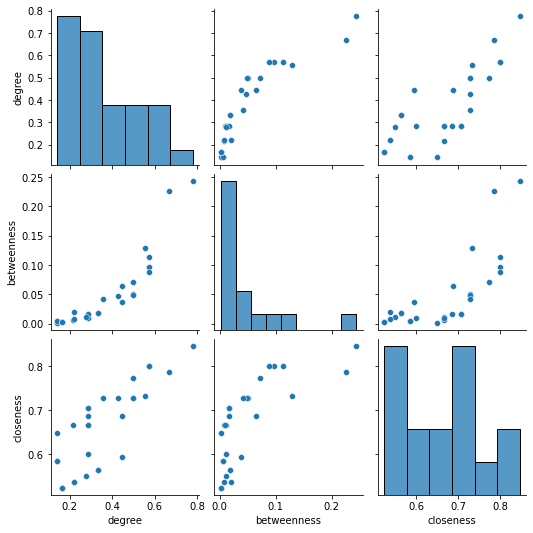

In [255]:
sns.pairplot(centrality)